In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
# import pickle

import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [3]:
def entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log(Pdf_safe))

def information(Pdf):
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return - Pdf_safe * np.log2(Pdf_safe)

def Shannon_entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log2(Pdf_safe))

In [5]:
member = 42
cluster = 0

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/Clusters/Cluster_{cluster}/P_cluster_{cluster}_m{member:03d}.nc"

P_m = xr.open_dataset(file_path)
P_m = P_m.sortby('hexint')

In [26]:
file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/Clusters/Cluster_{cluster}/P_cluster_{cluster}_m{member:03d}.nc"
file_path

'/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/Clusters/Cluster_0/P_cluster_0_m042.nc'

(8.5, 11.0)

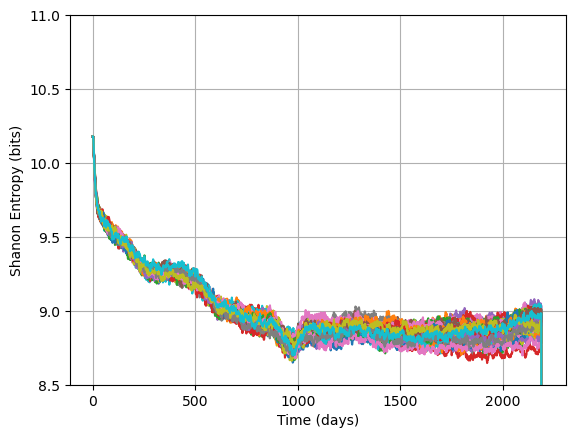

In [28]:
for member in range(1, 51):
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/Clusters/Cluster_{cluster}/P_cluster_{cluster}_m{member:03d}.nc"
    P_m = xr.open_dataset(file_path)
    plt.plot(P_m['entropy'][:])
    

# plt.plot(mean_entropy_all_01, ls='--', color='black', label='Mean All Members')

# plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.grid()
# plt.xlim(, 2000)
plt.ylim(8.5, 11)
# plt.semilogx()

In [29]:
hex_grid = hexfunc.int_to_hex(P_m.hexint.values)
hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)

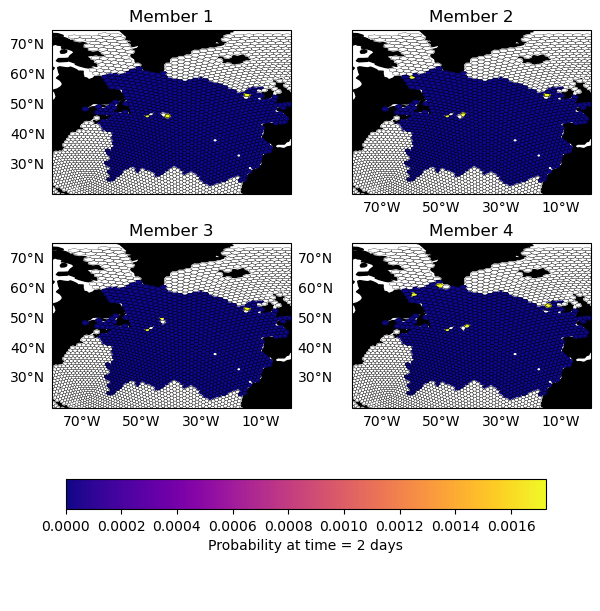

In [39]:
member = 42
ncol = 2
nrow = 3
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(6, 6),
                       subplot_kw={'projection': cartopy.crs.PlateCarree()},
                       sharey=True, constrained_layout=True)
axs = axs.reshape(ncol*nrow)
t = 2

for i, m in enumerate(range(1, 5)):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/Clusters/Cluster_{cluster}/P_cluster_{cluster}_m{m:03d}.nc"
    P_m = xr.open_dataset(file_path)
    P_m = P_m.sortby('hexint')
    
    hex_grid = hexfunc.int_to_hex(P_m.hexint.values)
    hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)
    
    axs[i].set_extent([-80, 0, 20, 75], crs=cartopy.crs.PlateCarree())
    axs[i].add_feature(cartopy.feature.LAND, zorder=0, color='black')
    
    axs[i].set_title(f'Member {m}')
    gl = axs[i].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.)

    im = hexbin_grid.pcolorhex(P_m['probability'][:, t].values, ax=axs[i], cmap='plasma', draw_edges=True)

    if i in [1, 3]:
        gl.left_labels = False

    if i < 1:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False

    if i in [2, 5]:
        gl.right_labels = True

for i in range(4, ncol*nrow):
    axs[i].axis('off')
    
bar_ax = fig.add_axes([0.1, 0.16, 0.8, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', label=f'Probability at time = {t} days')

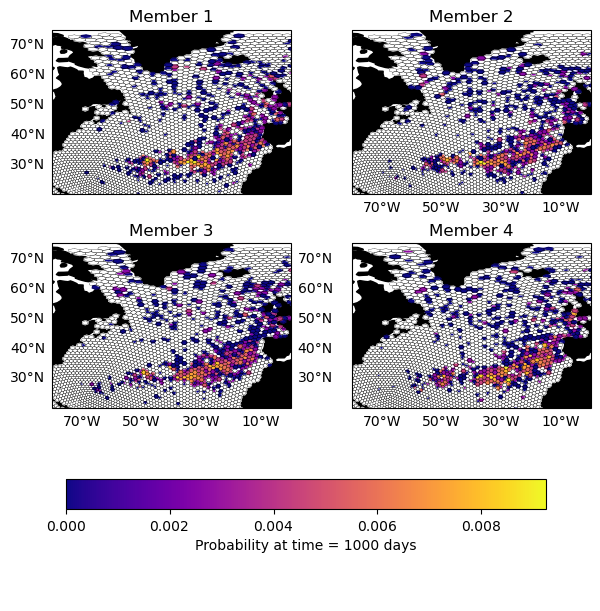

In [40]:
member = 42
ncol = 2
nrow = 3
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(6, 6),
                       subplot_kw={'projection': cartopy.crs.PlateCarree()},
                       sharey=True, constrained_layout=True)
axs = axs.reshape(ncol*nrow)
t = 1000

for i, m in enumerate(range(1, 5)):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/Clusters/Cluster_{cluster}/P_cluster_{cluster}_m{m:03d}.nc"
    P_m = xr.open_dataset(file_path)
    P_m = P_m.sortby('hexint')
    
    hex_grid = hexfunc.int_to_hex(P_m.hexint.values)
    hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)
    
    axs[i].set_extent([-80, 0, 20, 75], crs=cartopy.crs.PlateCarree())
    axs[i].add_feature(cartopy.feature.LAND, zorder=0, color='black')
    
    axs[i].set_title(f'Member {m}')
    gl = axs[i].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.)

    im = hexbin_grid.pcolorhex(P_m['probability'][:, t].values, ax=axs[i], cmap='plasma', draw_edges=True)

    if i in [1, 3]:
        gl.left_labels = False

    if i < 1:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False

    if i in [2, 5]:
        gl.right_labels = True

for i in range(4, ncol*nrow):
    axs[i].axis('off')
    
bar_ax = fig.add_axes([0.1, 0.16, 0.8, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', label=f'Probability at time = {t} days')